## Observations and Insights 

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# Observations:
# Observation #1 - Base on the box and whisker plot we can see that three of the four drug regimens have no outlier. This shows that the tumor volume data all fall within the 25th and 75th percentile. 

# Observation #2 - From the plot "Capomulin Treatment of Mouse G316", the plot shows a consistent reduction in tumor volume over time for mouse G316 when undergone the Capmulin treament. Near the nd of the treatment the tumor is below 25mm3.

# Observation #3 - Base on the  "Weight vs Tumor Volume for Capomulin" linear regression model we can see that there is a high corralation between tumor volume and weight of the mice. The correlation is 0.84 and the line is near 45 degrees to and to the right. This tells us that reducing the weight of the test subject will direct reduce its' tumor volume.

In [3]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
merged_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [4]:
# Checking the number of mice.
total_mice = merged_df['Mouse ID'].value_counts()
total_mice = total_mice.count()
total_mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_df = merged_df.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicated_df = duplicated_df.value_counts()
duplicated_df

False    1888
True        5
dtype: int64

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

In [8]:
# Checking the number of mice in the clean DataFrame.
clean_total_mice = clean_df['Mouse ID'].value_counts()
clean_total_mice = clean_total_mice.count()
clean_total_mice

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = clean_df['Tumor Volume (mm3)'].mean()
tumor_median = clean_df['Tumor Volume (mm3)'].median()
tumor_var = clean_df['Tumor Volume (mm3)'].var()
tumor_std = clean_df['Tumor Volume (mm3)'].std()

In [10]:
overall_results = pd.DataFrame({
                                "Tumor Mean" : [tumor_mean],
                                "Tumor Median": [tumor_median],
                                "Tumor Variance": [tumor_var],
                                "Tumor Standard Deviation": [tumor_std]
                              })
overall_results

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation
0,50.449276,48.951421,79.291277,8.904565


In [11]:
group_by_df = clean_df.groupby('Drug Regimen')

In [12]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_type_df = group_by_df["Drug Regimen"].unique()
summary_df = pd.DataFrame(drug_type_df)

In [13]:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_df['Tumor Mean'] = group_by_df['Tumor Volume (mm3)'].mean()
summary_df['Tumor Median'] = group_by_df['Tumor Volume (mm3)'].median()
summary_df['Tumor Variance'] = group_by_df['Tumor Volume (mm3)'].var()
summary_df['Tumor Standard Deviation'] = group_by_df['Tumor Volume (mm3)'].std()
summary_df['Tumor Standard Error'] = group_by_df['Tumor Volume (mm3)'].sem()
del summary_df['Drug Regimen']
summary_df

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,Tumor Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Timepoints')

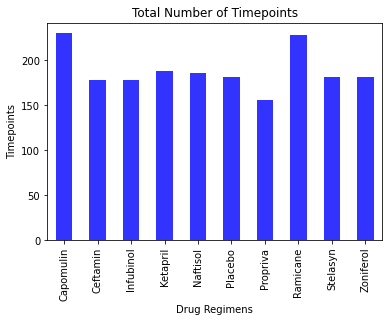

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pandas.
count_time = group_by_df['Timepoint'].count()
drug_chart = count_time.plot(kind='bar', color='blue',alpha=0.80)
drug_chart.set_title('Total Number of Timepoints')
drug_chart.set_xlabel('Drug Regimens')
drug_chart.set_ylabel('Timepoints')

(-0.5, 9.5)

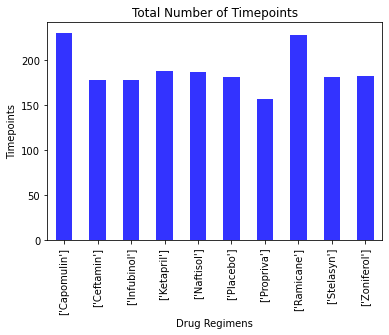

In [15]:
## Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(count_time))
plt.bar(x_axis, count_time, color='b', alpha=.80, align="center", width=.50)
tick_locations = [value for value in x_axis]
plt.title('Total Number of Timepoints')
plt.xlabel('Drug Regimens')
plt.ylabel('Timepoints')
plt.xticks(tick_locations, drug_type_df, rotation="vertical")
plt.xlim(-0.5, len(x_axis)-0.5)

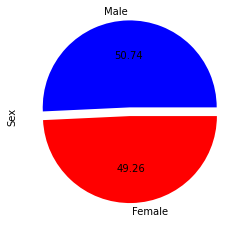

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = clean_df['Sex'].value_counts()
sex_count
male_count = (sex_count[0])
female_count = (sex_count[1])
colors = ['#0000FF','#FF0000']
explode = (0.1, 0)
sex_plot = sex_count.plot.pie(y='Sex', colors=colors, explode=explode, autopct='%.2f', figsize=(4,4))

<function matplotlib.pyplot.show(close=None, block=None)>

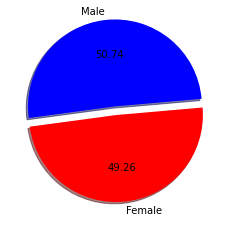

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count = clean_df['Sex'].value_counts()
sex_count
male_count = (sex_count[0])
female_count = (sex_count[1])
labels = ['Male','Female']
sizes = [male_count,female_count]
colors = ['blue','red']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%.2f", shadow=True, startangle=5)
plt.show

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

In [19]:
# Start by getting the last (greatest) timepoint for each mouse
capomulin_final = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_vol = pd.DataFrame(capomulin_final)
capomulin_merge = pd.merge(capomulin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")

capomulin_tumors = capomulin_merge["Tumor Volume (mm3)"]

quartiles = capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of the Capomulin treatment is: {lowerq}")
print(f"The upper quartile of the Capomulin treatment temperatures is: {upperq}")
print(f"The interquartile range for Capomulin treatment temperatures is: {iqr}")
print(f"The median of temperatures for the Capomulin treatment is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of the Capomulin treatment is: 32.37735684
The upper quartile of the Capomulin treatment temperatures is: 40.1592203
The interquartile range for Capomulin treatment temperatures is: 7.781863460000004
The median of temperatures for the Capomulin treatment is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [20]:
ramicane_final = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_vol = pd.DataFrame(ramicane_final)
ramicane_merge = pd.merge(ramicane_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")

ramicane_tumors = ramicane_merge["Tumor Volume (mm3)"]

quartiles = ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of the Ramicane treatment is: {lowerq}")
print(f"The upper quartile of the Ramicane treatment temperatures is: {upperq}")
print(f"The interquartile range for Ramicane treatment temperatures is: {iqr}")
print(f"The median of temperatures for the Ramicane treatment is: {quartiles[0.5]} ")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of the Ramicane treatment is: 31.56046955
The upper quartile of the Ramicane treatment temperatures is: 40.65900627
The interquartile range for Ramicane treatment temperatures is: 9.098536719999998
The median of temperatures for the Ramicane treatment is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [34]:
infubinol_final = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_vol = pd.DataFrame(infubinol_final)
infubinol_merge = pd.merge(infubinol_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
infubinol_tumors = infubinol_merge["Tumor Volume (mm3)"]

quartiles = infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of the Infubinol treatment is: {lowerq}")
print(f"The upper quartile of the Infubinol treatment temperatures is: {upperq}")
print(f"The interquartile range for Infubinol treatment temperatures is: {iqr}")
print(f"The median of temperatures for the Infubinol treatment is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of the Infubinol treatment is: 54.04860769
The upper quartile of the Infubinol treatment temperatures is: 65.52574285
The interquartile range for Infubinol treatment temperatures is: 11.477135160000003
The median of temperatures for the Infubinol treatment is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [35]:
# Calculate the IQR and quantitatively determine if there are any potential outliers for Ceftamin 
ceftamin_final = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_vol = pd.DataFrame(ceftamin_final)
ceftamin_merge = pd.merge(ceftamin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")

ceftamin_tumors = ceftamin_merge["Tumor Volume (mm3)"]

quartiles = ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of the Ceftamin treatment is: {lowerq}")
print(f"The upper quartile of the Ceftamin treatment temperatures is: {upperq}")
print(f"The interquartile range for Ceftamin treatment temperatures is: {iqr}")
print(f"The median of temperatures for the Ceftamin treatment is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of the Ceftamin treatment is: 48.72207785
The upper quartile of the Ceftamin treatment temperatures is: 64.29983003
The interquartile range for Ceftamin treatment temperatures is: 15.577752179999997
The median of temperatures for the Ceftamin treatment is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


<ipython-input-38-51d12f22f863>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Drug_Regimen,fontsize=13)


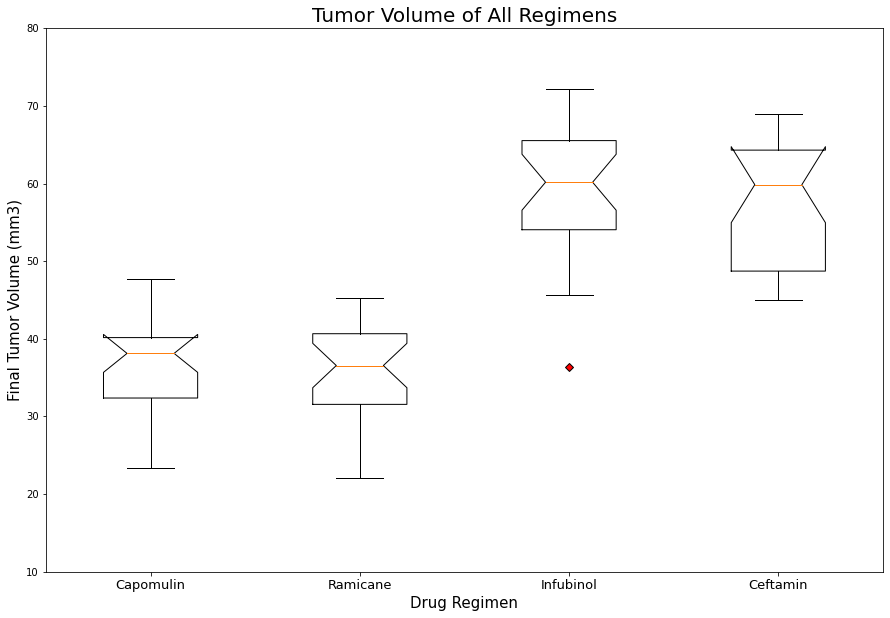

In [38]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_data = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]
Drug_Regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
fig1, ax1 = plt.subplots(figsize=(15,10))
red_diamond = dict(markerfacecolor='r', marker='D')
ax1.set_title('Tumor Volume of All Regimens',fontsize =20)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 15)
ax1.set_xlabel('Drug Regimen',fontsize = 15)
ax1.set_xticklabels(Drug_Regimen,fontsize=13)
ax1.boxplot(tumor_data, notch=True, flierprops=red_diamond)
plt.ylim(10, 80)
plt.show()


## Line and Scatter Plots

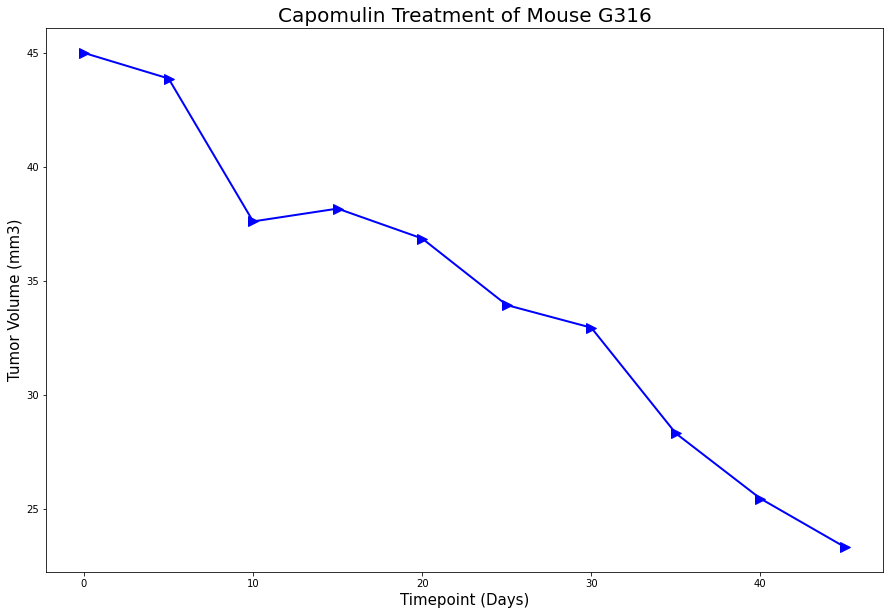

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capmousedf = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
x_axis = capmousedf['Timepoint'] 
tumor_volume = capmousedf['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin Treatment of Mouse G316',fontsize =20)
plt.plot(x_axis, tumor_volume,linewidth=2, markersize=10,marker=">",color="b")
plt.xlabel('Timepoint (Days)',fontsize =15)
plt.ylabel('Tumor Volume (mm3)',fontsize =15)
plt.show()

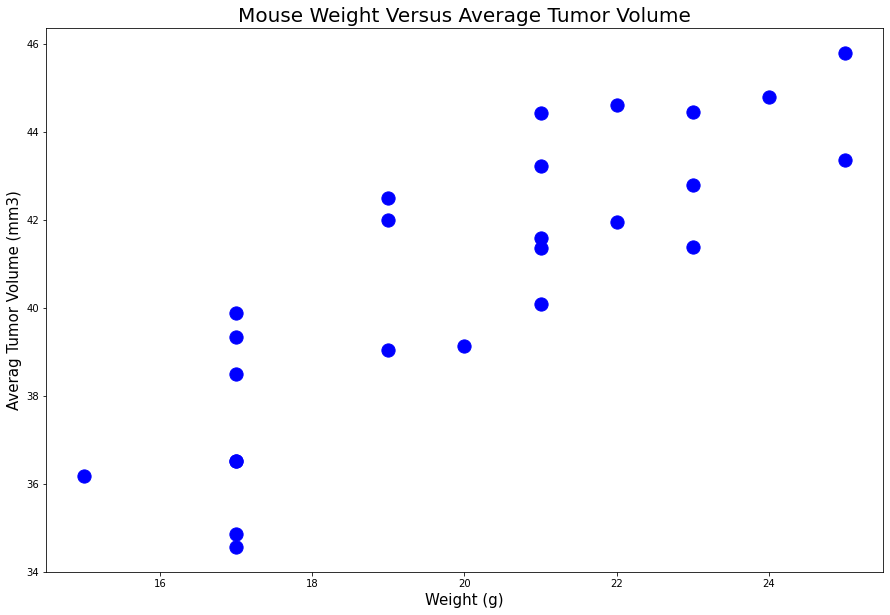

In [95]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_volume_cap = capomulin_df.groupby(['Mouse ID']).mean()
fig1, ax1 = plt.subplots(figsize =(15, 10))
marker_size = 10
plt.scatter(avg_volume_cap['Weight (g)'],avg_volume_cap['Tumor Volume (mm3)'],s=175, color="b")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =20)
plt.xlabel('Weight (g)',fontsize =15)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =15)
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


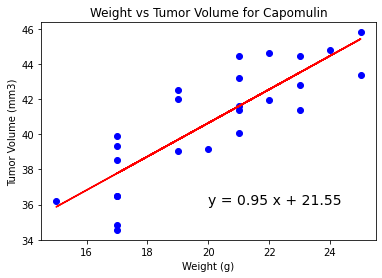

In [96]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(avg_volume_cap['Weight (g)'],avg_volume_cap['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")         

avg_volume_cap = capomulin_df.groupby(['Mouse ID']).mean()

x_values = capomulin_df['Timepoint']
y_values = capomulin_df["Tumor Volume (mm3)"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(avg_volume_cap['Weight (g)'],avg_volume_cap['Tumor Volume (mm3)'])
regress_values = avg_volume_cap['Weight (g)']* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(avg_volume_cap["Weight (g)"],avg_volume_cap["Tumor Volume (mm3)"],color='b')
plt.plot(avg_volume_cap["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()